In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
!pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [16]:
import pandas as pd
df = pd.read_csv("sp500-10-year-daily-chart.csv", skiprows=15)

In [18]:
df.reset_index(drop=True, inplace=True)

In [20]:
print(df.head())

         date    value
0  2010-10-08  1165.15
1  2010-10-11  1165.32
2  2010-10-12  1169.77
3  2010-10-13  1178.10
4  2010-10-14  1173.81


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'], label='S&P 500 Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('S&P 500 Value Over Time')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'value'

<Figure size 1200x600 with 0 Axes>

In [28]:
print(df.columns)


Index(['date', ' value'], dtype='object')


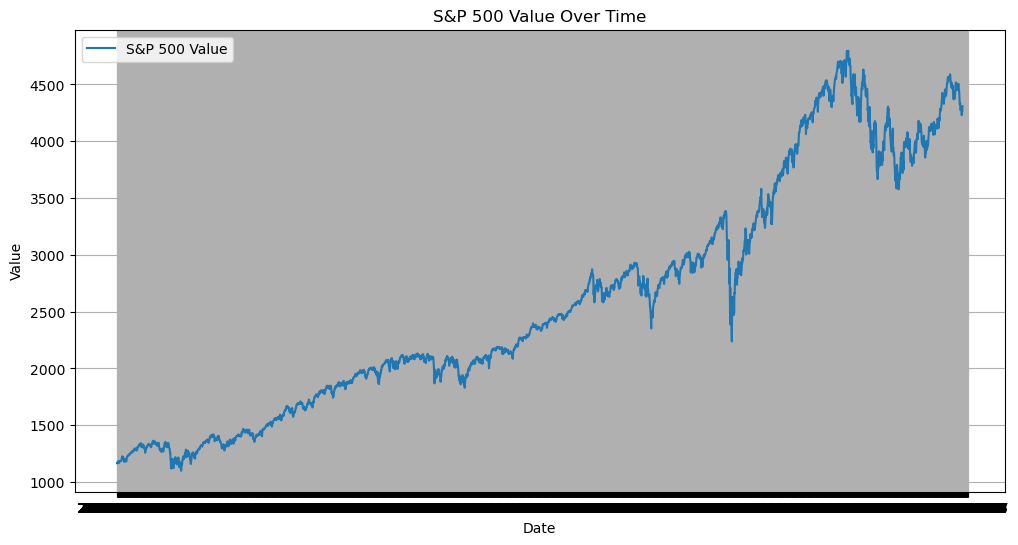

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df[' value'], label='S&P 500 Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('S&P 500 Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3295 non-null   object 
 1    value  3274 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.6+ KB


In [34]:
print(df.describe())

             value
count  3274.000000
mean   2583.806726
std    1022.544737
min    1099.230000
25%    1809.862500
50%    2365.585000
75%    3283.532500
max    4796.560000


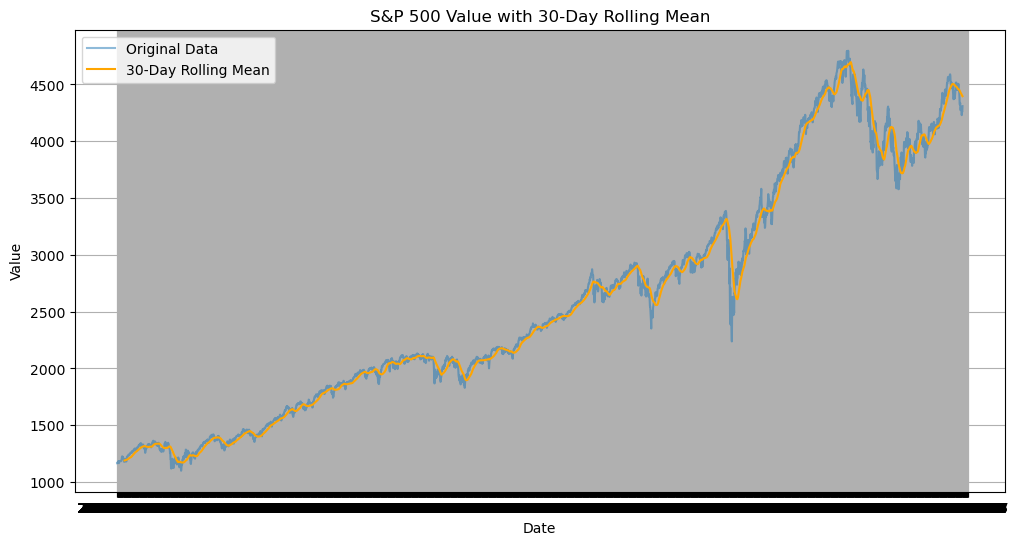

In [38]:
# Calculate a 30-day rolling mean
rolling_mean = df[' value'].rolling(window=30).mean()

# Plot the original data and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df[' value'], alpha=0.5, label='Original Data')
plt.plot(df['date'], rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('S&P 500 Value with 30-Day Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()



In [42]:
df_cleaned = df.dropna(subset=[' value'])

In [44]:
result = sm.tsa.seasonal_decompose(df_cleaned[' value'], model='additive', period=30)  # Adjust the period as needed

In [48]:
df[' value'].fillna(df[' value'].mean(), inplace=True)

In [50]:
result = sm.tsa.seasonal_decompose(df[' value'], model='additive', period=30)  # Adjust the period as needed

In [62]:
df['date'] = pd.to_datetime(df['date'])


In [64]:
df['year'] = df['date'].dt.year


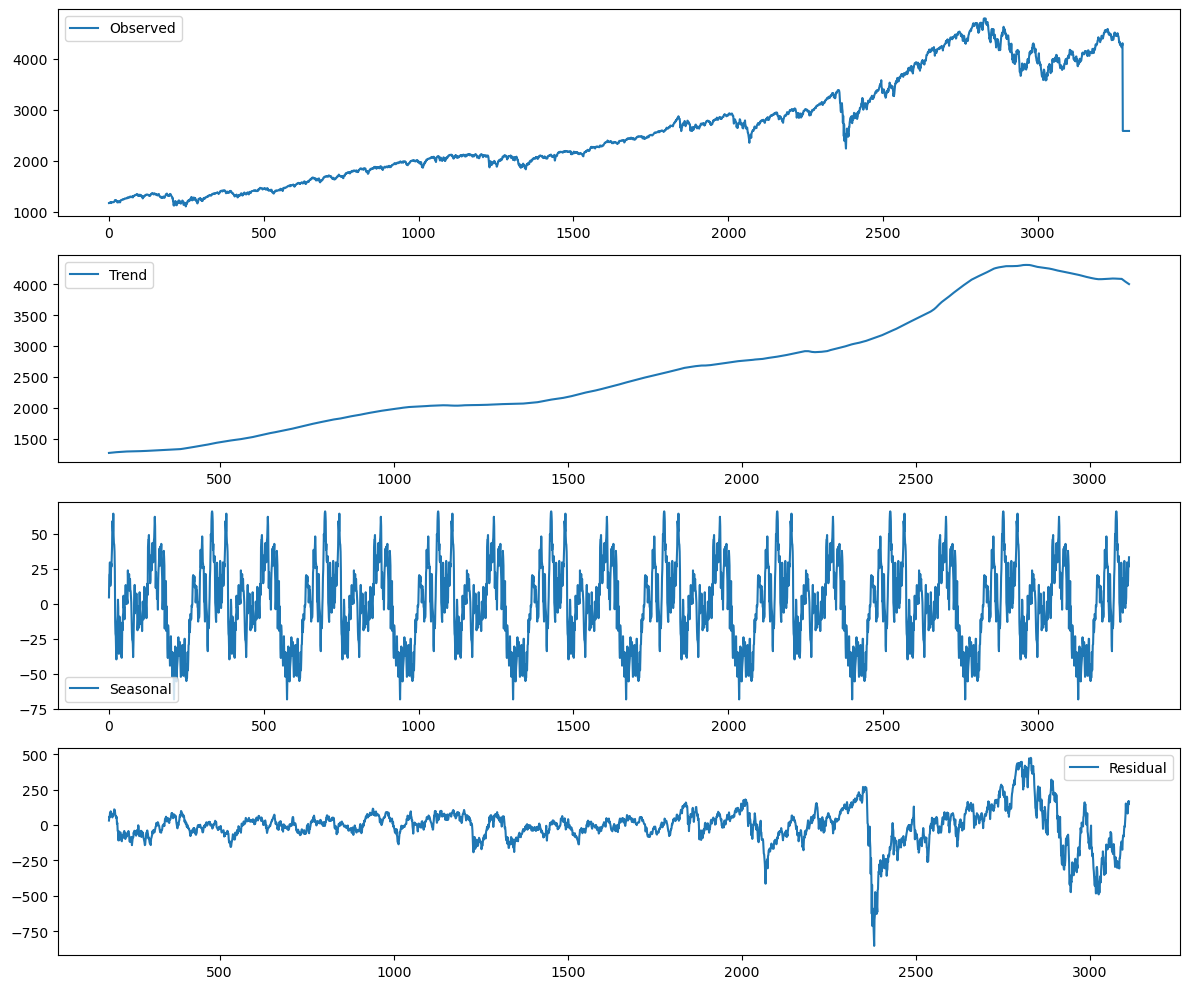

In [58]:
import statsmodels.api as sm

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(df[' value'], model='additive', period=365)  # Adjust the period as needed

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Create a dictionary to store data frames for each year
yearly_data = {}
for year, group in df.groupby('year'):
    yearly_data[year] = group.copy()


In [70]:
import statsmodels.api as sm

# Dictionary to store decomposition results
decomposition_results = {}
seasonal_period = 12  # Modify this value as needed

for year, data in yearly_data.items():
    result = sm.tsa.seasonal_decompose(data[' value'], model='additive', period=seasonal_period)
    decomposition_results[year] = result


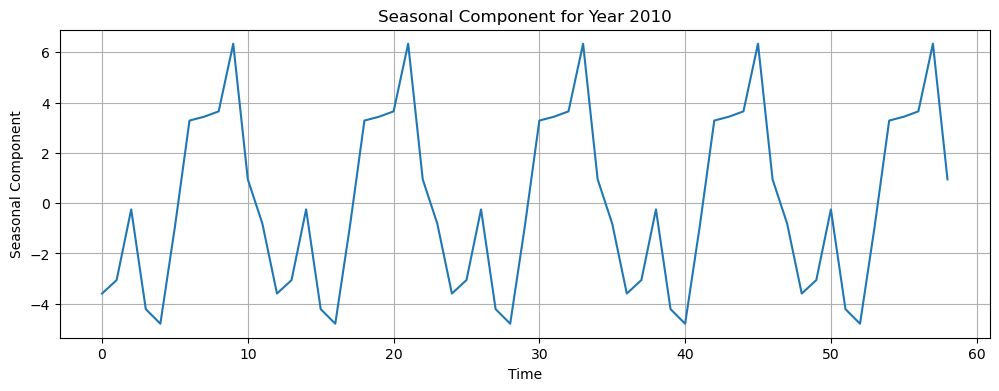

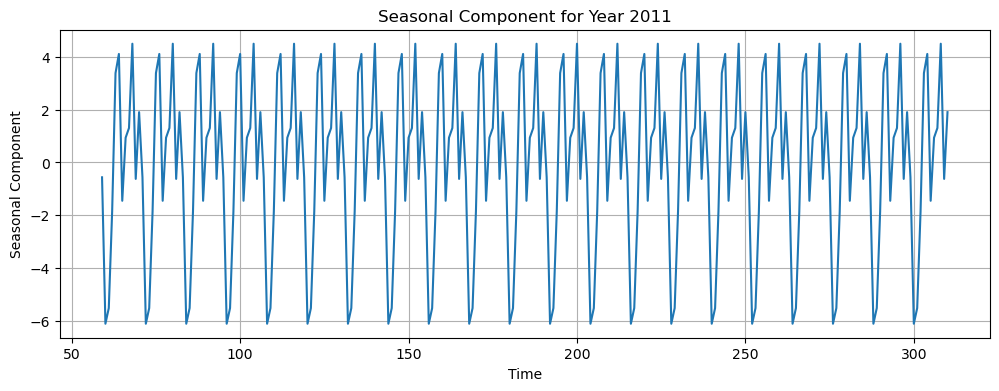

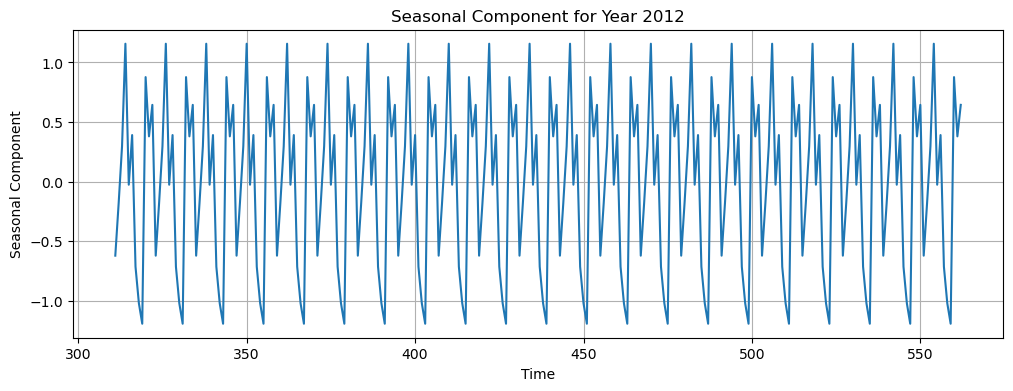

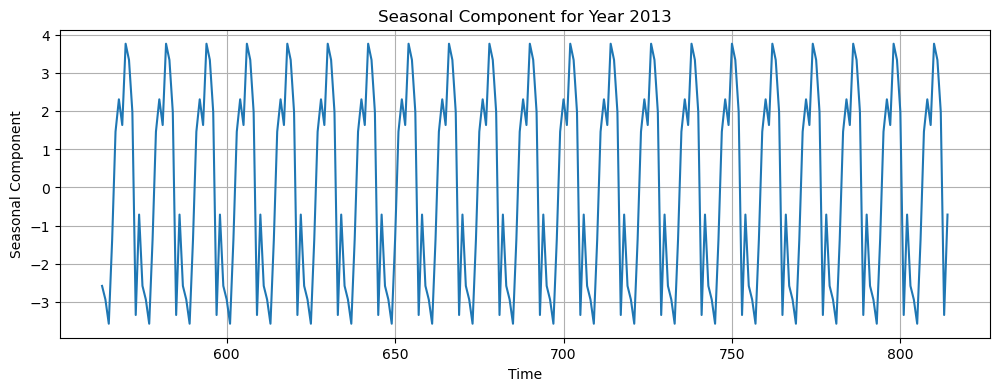

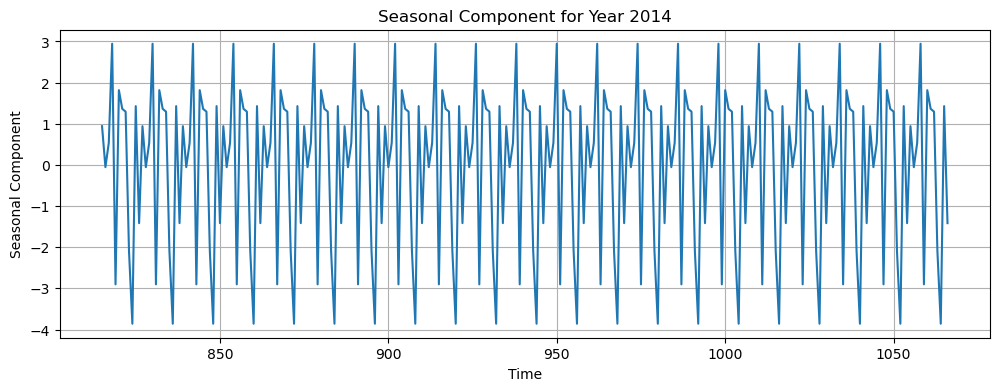

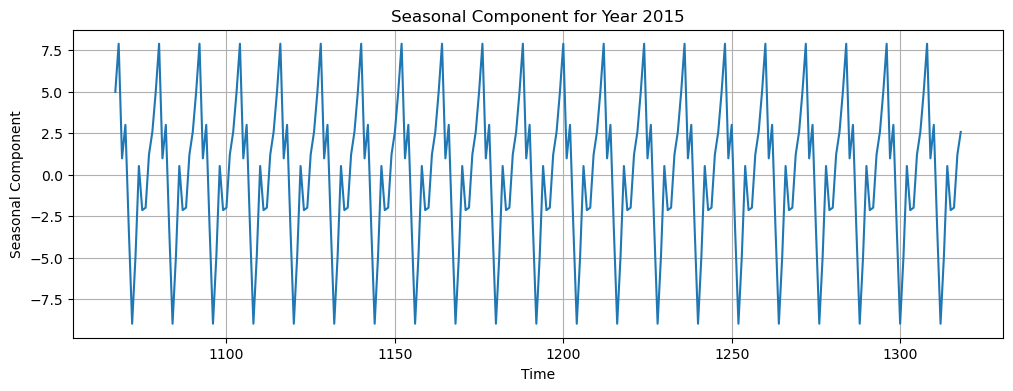

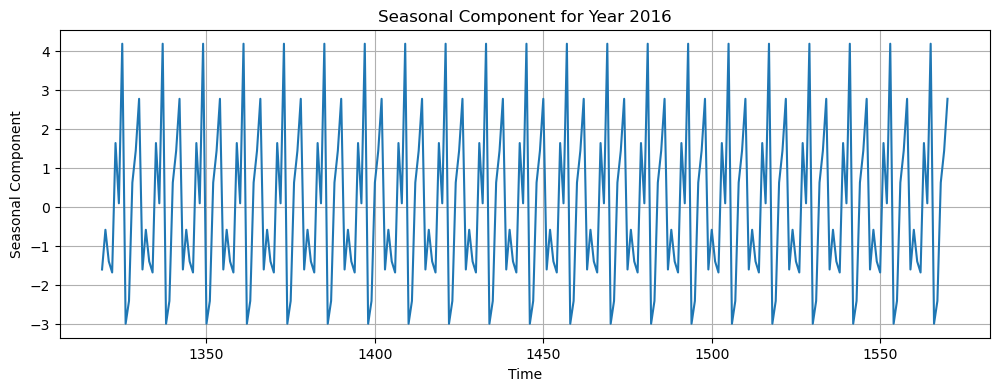

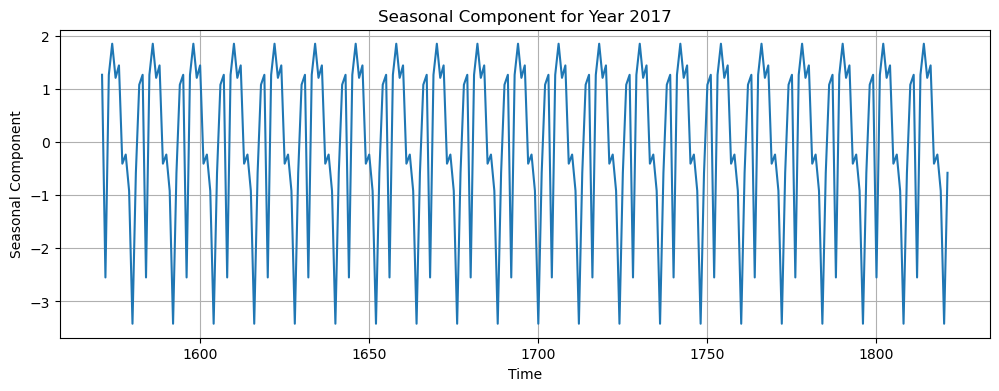

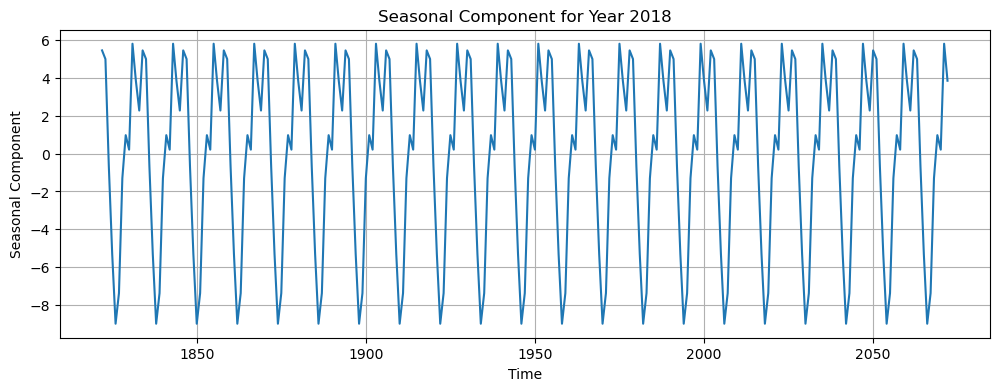

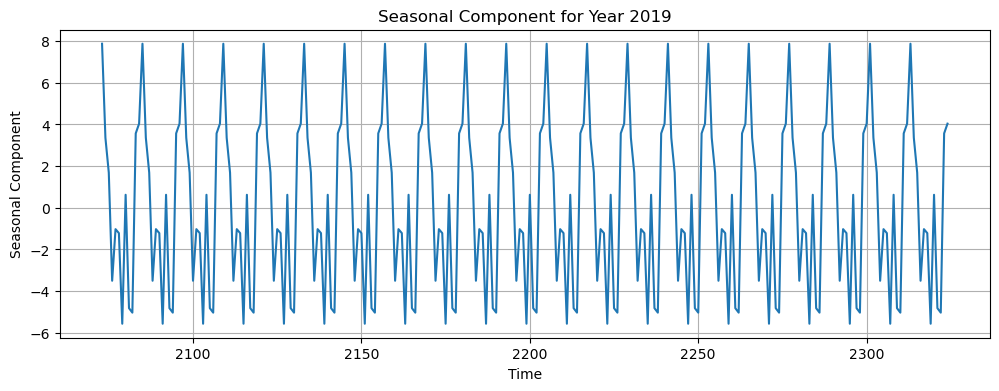

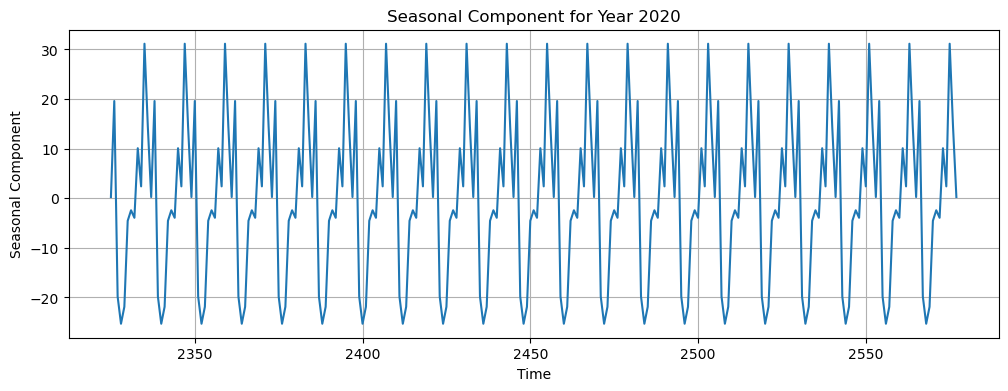

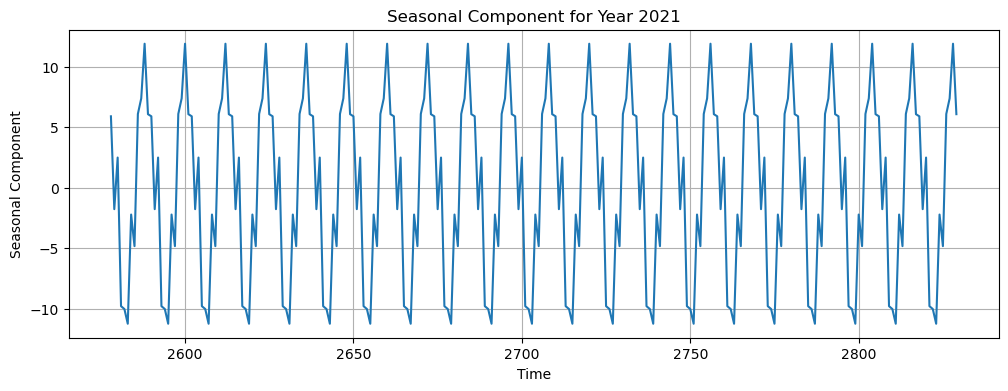

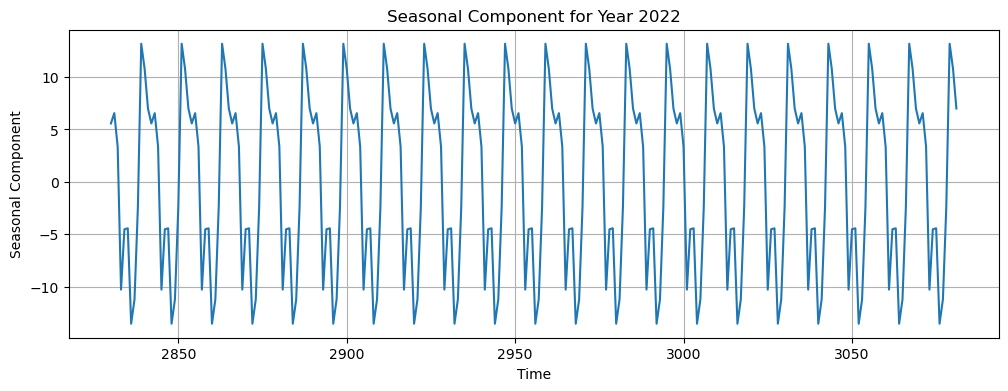

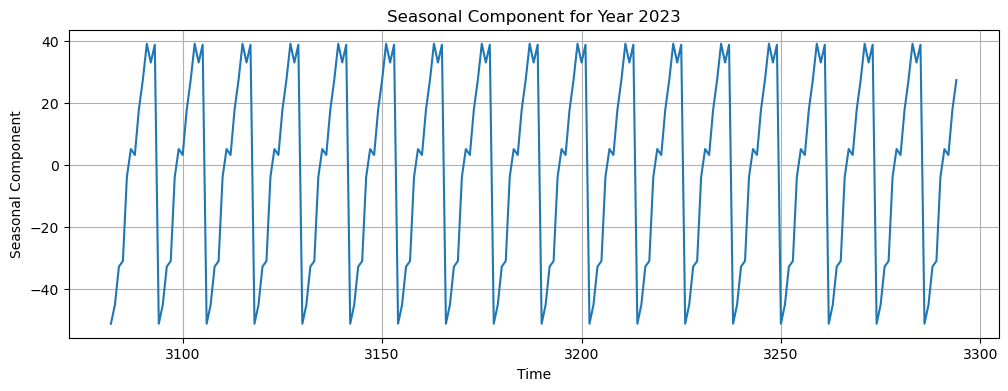

In [72]:
import matplotlib.pyplot as plt

# Plot seasonal component for each year
for year, result in decomposition_results.items():
    plt.figure(figsize=(12, 4))
    plt.plot(result.seasonal)
    plt.title(f'Seasonal Component for Year {year}')
    plt.xlabel('Time')
    plt.ylabel('Seasonal Component')
    plt.grid(True)
    plt.show()


In [ ]:
#start predicting

In [74]:
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

In [78]:
# Example of creating lag features for daily values
for i in range(1, 31):  # Create lag features for the past 30 days
    df[f'lag_{i}'] = df[' value'].shift(i)

# Example of creating rolling mean feature
df['rolling_mean_7'] = df[' value'].rolling(window=7).mean()


In [80]:
# Split data into training and testing sets
train_data = df.iloc[:-365]  # Use all data except the last 365 days for training
test_data = df.iloc[-365:]  # Use the last 365 days for testing


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is

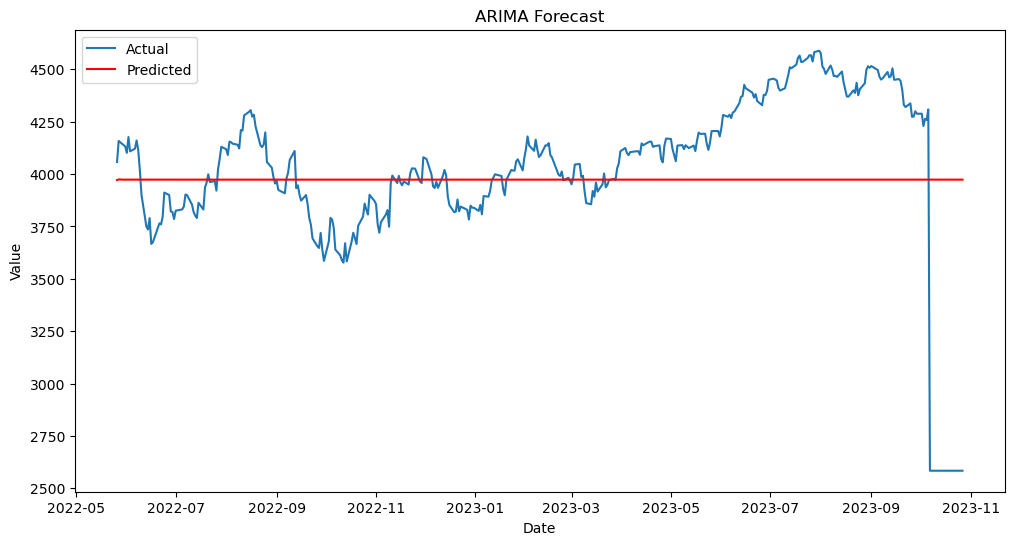

In [131]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have chosen values for p, d, and q
p = 1
d = 1
q = 1

# Fit ARIMA model
model = ARIMA(train_data[' value'], order=(p, d, q))
results = model.fit()

# Make predictions
forecast_values = results.forecast(steps=len(test_data))

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[' value'], label='Actual')
plt.plot(test_data.index, forecast_values, label='Predicted', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



In [135]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming you have a time series in a pandas DataFrame 'train_data' or 'test_data' with a column 'value'
result = adfuller(train_data[' value'])  # Replace 'train_data' with the appropriate DataFrame
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])



ADF Statistic: -0.4195070402417981
p-value: 0.9067904994557215
Critical Values: {'1%': -3.432591458200774, '5%': -2.862530326950686, '10%': -2.567297178762432}


In [137]:
import pandas as pd

# Calculate the first difference
df['first_difference'] = df[' value'].diff()


In [139]:
# Assuming your data has daily frequency and you want to apply seasonal differencing with a lag of 365 days
df['seasonal_difference'] = df[' value'].diff(365)


In [141]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have a time series in a pandas DataFrame 'df' with a column 'first_difference'
result = adfuller(df['first_difference'].dropna())  # Drop NaN values
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -18.282224680359892
p-value: 2.3069981334178657e-30


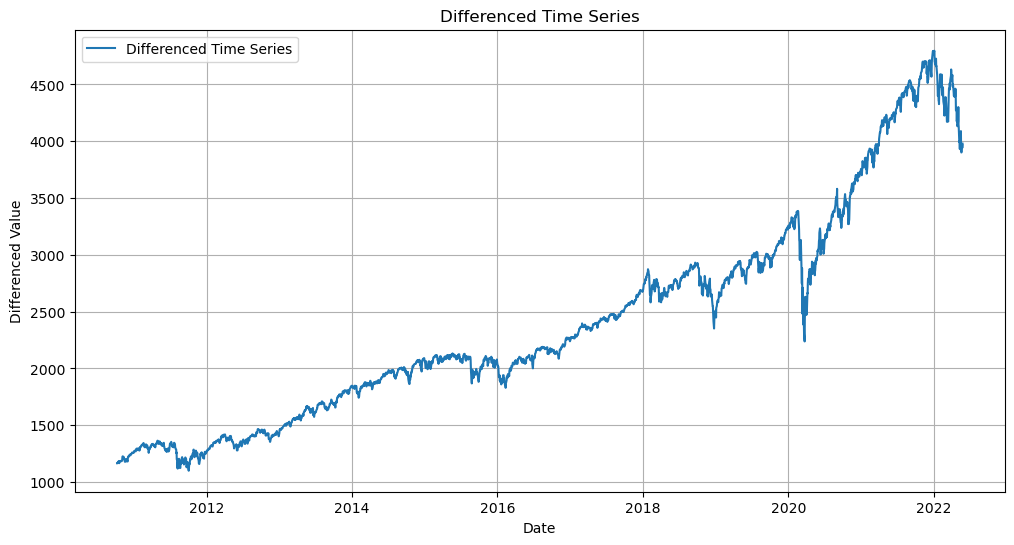

In [145]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'train_data' with the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[' value'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
train_data['second_difference'] = train_data[' value'].diff().diff()

In [149]:
train_data = train_data.copy()
train_data['second_difference'] = train_data[' value'].diff().diff()


In [161]:
train_data = train_data.asfreq('D')  # Set the frequency to daily ('D')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_data[' value'], model='additive')
train_data['trend'] = decomposition.trend
train_data['seasonal'] = decomposition.seasonal
train_data['residual'] = decomposition.resid


In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_data[' value'], model='additive')
train_data['residual'] = decomposition.resid


ValueError: This function does not handle missing values

In [167]:
train_data[' value'].fillna(method='ffill', inplace=True)

In [169]:
train_data.dropna(subset=[' value'], inplace=True)

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_data[' value'], model='additive')
train_data['trend'] = decomposition.trend
train_data['seasonal'] = decomposition.seasonal
train_data['residual'] = decomposition.resid


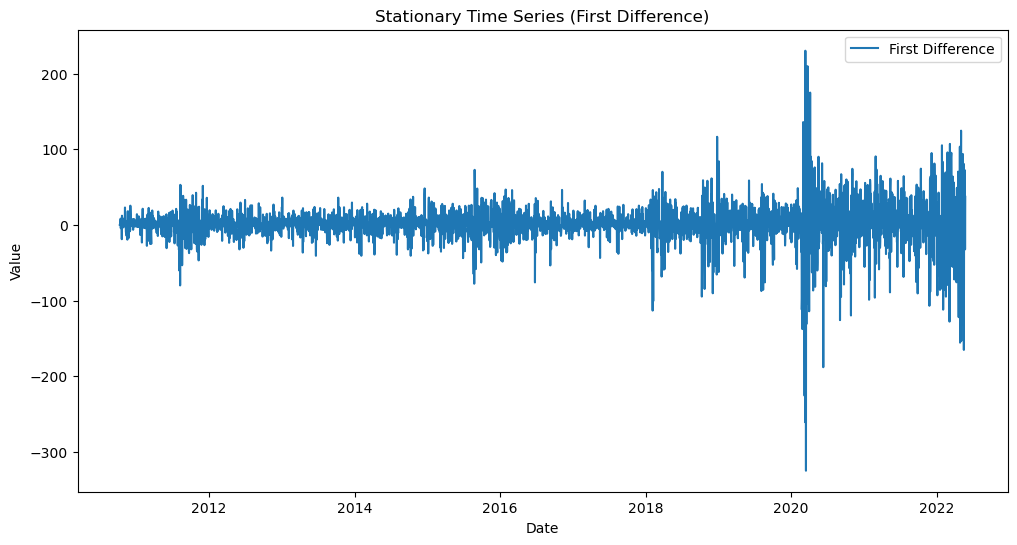

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['first_difference'], label='First Difference')
plt.title('Stationary Time Series (First Difference)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [175]:
train_data['first_difference'] = train_data[' value'].diff()


In [179]:
train_data['second_difference'] = train_data[' value'].diff().diff()

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_data[' value'], model='multiplicative')
train_data['residual'] = decomposition.resid


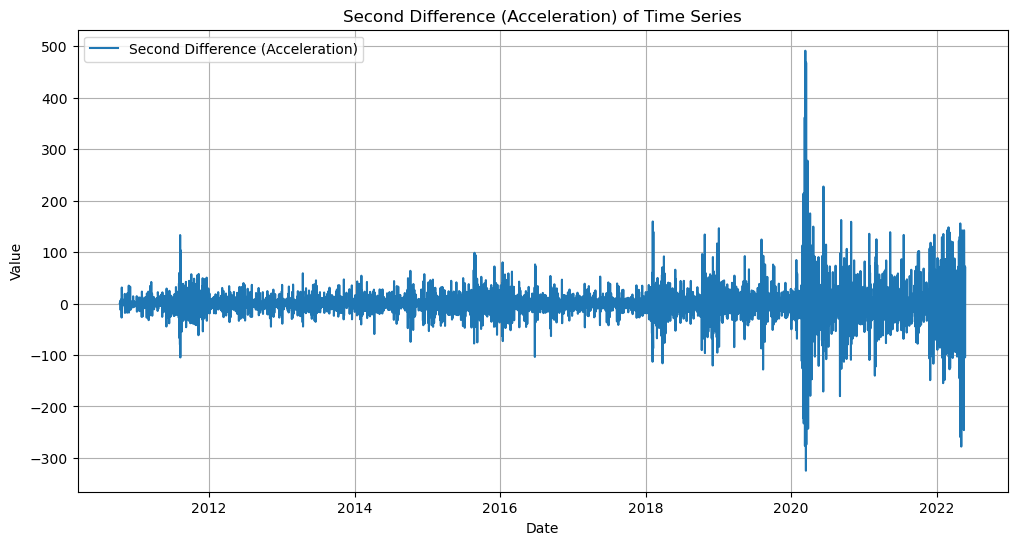

In [185]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train_data' with a column 'second_difference' containing the second difference
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['second_difference'], label='Second Difference (Acceleration)')
plt.title('Second Difference (Acceleration) of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
